In [1]:
%pwd

'c:\\Users\\debnathk\\Desktop\\Study\\files\\codes\\DLEPS-main\\code\\DLEPS\\dleps\\code\\DLEPS'

In [2]:
import h5py
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [3]:
# Load the training set
df = pd.read_csv('../../../../../data/drug full screening data NEW edited.csv')
df

,DRUG NAME,MDA7+D1+1,MDA7+D1+2,MDA7+D1+3,MDA7+D2+1,MDA7+D2+2,MDA7+D2+3,D1+1,D1+2,D1+3,...,MDA7+D1+9,MDA7+D2+7,MDA7+D2+8,MDA7+D2+9,D1+7,D1+8,D1+9,D2+7,D2+8,D2+9
0,Angiotensin II,0.467198,0.492122,0.500198,0.651233,0.762780,0.484070,0.878523,0.952131,1.122307,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Levetiracetam,0.424844,0.503705,0.433523,0.517083,0.498133,0.485443,0.985621,1.002564,1.297499,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Daptomycin,0.462072,0.509482,0.424083,0.451883,0.495565,0.472871,0.980899,0.906619,0.982075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Lansoprazole,0.464806,0.494925,0.502533,0.491361,0.479975,0.443513,1.363714,0.919337,1.273511,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adapalene,0.407362,0.425062,0.490854,0.489590,0.513733,0.395002,0.437537,0.569486,0.435191,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,Chondroitin sulfate,0.750820,0.741770,0.826674,0.835227,0.807444,0.802552,0.790976,0.905025,0.865902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967,Aucubin,0.714064,0.849337,0.563837,0.869225,0.700734,0.823960,0.808023,0.719939,0.689561,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1968,Cepharanthine,0.592418,0.708048,0.883598,0.811905,0.849278,0.827013,1.053463,1.007266,0.957949,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1969,4-Aminobutyric acid,0.705559,0.941525,0.717699,0.887134,0.716770,0.617353,0.804578,0.716076,0.845920,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# df_merged = pd.read_csv('../../../../../data/gene_expression_data/train_chembl_merged_smiles.csv')
# df_merged

In [5]:
# drug_names_unique = pd.read_csv('../../../../../data/gen_exp_drugs.csv')
# drug_names_unique.drop_duplicates(inplace=True)
# drug_names_unique

In [6]:
# Check how many unique drugs are present in the merged dataset

# x = df_merged[df_merged['pref_name'].str.lower().isin(drug_names_unique['drug_name'])]
# x.drop_duplicates(subset='pref_name', inplace=True)
# x.to_csv('../../../../../data/final_425_common_train_rna-seq_dataset.csv', index=False)
# x

df_merged = pd.read_csv('../../../../../data/final_425_common_train_rna-seq_dataset.csv')
df_merged

,DRUG_NAME,SMILES,standardized_SMILES,pref_name,molecule_structures
0,5-Methoxytryptamine,COC1=CC(C(CCN)=CN2)=C2C=C1,COc1ccc2[nH]cc(CCN)c2c1,5-METHOXYTRYPTAMINE,COc1ccc2[nH]cc(CCN)c2c1
1,ACP-196,O=C(NC1=NC=CC=C1)C2=CC=C(C3=C4C(N)=NC=CN4C([C@...,CC#CC(=O)N1CCC[C@H]1c1nc(-c2ccc(C(=O)Nc3ccccn3...,ACALABRUTINIB,CC#CC(=O)N1CCC[C@H]1c1nc(-c2ccc(C(=O)Nc3ccccn3...
2,Acemetacin,CC1=C(C2=C(N1C(=O)C3=CC=C(C=C3)Cl)C=CC(=C2)OC)...,COc1ccc2c(c1)c(CC(=O)OCC(=O)O)c(C)n2C(=O)c1ccc...,ACEMETACIN,COc1ccc2c(c1)c(CC(=O)OCC(=O)O)c(C)n2C(=O)c1ccc...
3,Acipimox,CC1=CN=C(C=[N+]1[O-])C(=O)O,Cc1cnc(C(=O)O)c[n+]1[O-],ACIPIMOX,Cc1cnc(C(=O)O)c[n+]1[O-]
4,Adapalene,COC1=C(C=C(C=C1)C2=CC3=C(C=C2)C=C(C=C3)C(=O)O)...,COc1ccc(-c2ccc3cc(C(=O)O)ccc3c2)cc1C12CC3CC(CC...,ADAPALENE,COc1ccc(-c2ccc3cc(C(=O)O)ccc3c2)cc1C12CC3CC(CC...
...,...,...,...,...,...
420,Zibotentan (ZD4054),CC1=CN=C(C(=N1)OC)NS(=O)(=O)C2=C(N=CC=C2)C3=CC...,COc1nc(C)cnc1NS(=O)(=O)c1cccnc1-c1ccc(-c2nnco2...,ZIBOTENTAN,COc1nc(C)cnc1NS(=O)(=O)c1cccnc1-c1ccc(-c2nnco2...
421,Zileuton,CC(C1=CC2=CC=CC=C2S1)N(C(=O)N)O,CC(c1cc2ccccc2s1)N(O)C(N)=O,ZILEUTON,CC(c1cc2ccccc2s1)N(O)C(N)=O
422,Ziprasidone,C1CN(CCN1CCC2=C(C=C3C(=C2)CC(=O)N3)Cl)C4=NSC5=...,O=C1Cc2cc(CCN3CCN(c4nsc5ccccc45)CC3)c(Cl)cc2N1,ZIPRASIDONE,O=C1Cc2cc(CCN3CCN(c4nsc5ccccc45)CC3)c(Cl)cc2N1
423,Zonisamide,C1=CC=C2C(=C1)C(=NO2)CS(=O)(=O)N,NS(=O)(=O)Cc1noc2ccccc12,ZONISAMIDE,NS(=O)(=O)Cc1noc2ccccc12


In [7]:
# Merge x with df

df = df.merge(df_merged, left_on='DRUG NAME', right_on='DRUG_NAME')
df.sort_values('pref_name', ascending=True, inplace=True)
df

,DRUG NAME,MDA7+D1+1,MDA7+D1+2,MDA7+D1+3,MDA7+D2+1,MDA7+D2+2,MDA7+D2+3,D1+1,D1+2,D1+3,...,D1+8,D1+9,D2+7,D2+8,D2+9,DRUG_NAME,SMILES,standardized_SMILES,pref_name,molecule_structures
372,5-Methoxytryptamine,0.723188,0.801154,0.822601,0.839875,0.834651,0.819050,1.001127,0.976009,0.948555,...,NaN,NaN,NaN,NaN,NaN,5-Methoxytryptamine,COC1=CC(C(CCN)=CN2)=C2C=C1,COc1ccc2[nH]cc(CCN)c2c1,5-METHOXYTRYPTAMINE,COc1ccc2[nH]cc(CCN)c2c1
366,ACP-196,0.627039,0.772925,0.757654,0.762336,0.803738,0.807494,0.900312,0.894956,0.836284,...,NaN,NaN,NaN,NaN,NaN,ACP-196,O=C(NC1=NC=CC=C1)C2=CC=C(C3=C4C(N)=NC=CN4C([C@...,CC#CC(=O)N1CCC[C@H]1c1nc(-c2ccc(C(=O)Nc3ccccn3...,ACALABRUTINIB,CC#CC(=O)N1CCC[C@H]1c1nc(-c2ccc(C(=O)Nc3ccccn3...
177,Acemetacin,0.587154,0.662696,0.692944,0.931102,0.716981,0.550529,0.752684,0.983370,0.906611,...,NaN,NaN,NaN,NaN,NaN,Acemetacin,CC1=C(C2=C(N1C(=O)C3=CC=C(C=C3)Cl)C=CC(=C2)OC)...,COc1ccc2c(c1)c(CC(=O)OCC(=O)O)c(C)n2C(=O)c1ccc...,ACEMETACIN,COc1ccc2c(c1)c(CC(=O)OCC(=O)O)c(C)n2C(=O)c1ccc...
282,Acipimox,0.902399,0.939315,0.990576,1.059831,0.901014,1.065956,0.945784,1.126811,1.140040,...,NaN,NaN,NaN,NaN,NaN,Acipimox,CC1=CN=C(C=[N+]1[O-])C(=O)O,Cc1cnc(C(=O)O)c[n+]1[O-],ACIPIMOX,Cc1cnc(C(=O)O)c[n+]1[O-]
0,Adapalene,0.407362,0.425062,0.490854,0.489590,0.513733,0.395002,0.437537,0.569486,0.435191,...,NaN,NaN,NaN,NaN,NaN,Adapalene,COC1=C(C=C(C=C1)C2=CC3=C(C=C2)C=C(C=C3)C(=O)O)...,COc1ccc(-c2ccc3cc(C(=O)O)ccc3c2)cc1C12CC3CC(CC...,ADAPALENE,COc1ccc(-c2ccc3cc(C(=O)O)ccc3c2)cc1C12CC3CC(CC...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Zibotentan (ZD4054),0.752919,0.913578,0.820408,0.710610,0.751213,0.728701,0.895915,0.794392,0.893209,...,NaN,NaN,NaN,NaN,NaN,Zibotentan (ZD4054),CC1=CN=C(C(=N1)OC)NS(=O)(=O)C2=C(N=CC=C2)C3=CC...,COc1nc(C)cnc1NS(=O)(=O)c1cccnc1-c1ccc(-c2nnco2...,ZIBOTENTAN,COc1nc(C)cnc1NS(=O)(=O)c1cccnc1-c1ccc(-c2nnco2...
94,Zileuton,0.665070,0.687888,0.820727,0.620963,0.651704,0.639108,0.762338,0.525181,0.765302,...,NaN,NaN,NaN,NaN,NaN,Zileuton,CC(C1=CC2=CC=CC=C2S1)N(C(=O)N)O,CC(c1cc2ccccc2s1)N(O)C(N)=O,ZILEUTON,CC(c1cc2ccccc2s1)N(O)C(N)=O
56,Ziprasidone,0.488007,0.446471,0.405887,0.406742,0.393678,0.383321,0.380997,0.428339,0.412881,...,NaN,NaN,NaN,NaN,NaN,Ziprasidone,C1CN(CCN1CCC2=C(C=C3C(=C2)CC(=O)N3)Cl)C4=NSC5=...,O=C1Cc2cc(CCN3CCN(c4nsc5ccccc45)CC3)c(Cl)cc2N1,ZIPRASIDONE,O=C1Cc2cc(CCN3CCN(c4nsc5ccccc45)CC3)c(Cl)cc2N1
93,Zonisamide,0.673634,0.773978,0.726651,0.690597,0.698378,0.677257,0.919629,0.797323,0.860303,...,NaN,NaN,NaN,NaN,NaN,Zonisamide,C1=CC=C2C(=C1)C(=NO2)CS(=O)(=O)N,NS(=O)(=O)Cc1noc2ccccc12,ZONISAMIDE,NS(=O)(=O)Cc1noc2ccccc12


In [8]:
# Print the columns

df.columns

Index(['DRUG NAME', 'MDA7+D1+1', 'MDA7+D1+2', 'MDA7+D1+3', 'MDA7+D2+1',
       'MDA7+D2+2', 'MDA7+D2+3', 'D1+1', 'D1+2', 'D1+3', 'D2+1', 'D2+2',
       'D2+3', 'MDA7+D1+4', 'MDA7+D1+5', 'MDA7+D1+6', 'MDA7+D2+4', 'MDA7+D2+5',
       'MDA7+D2+6', 'D1+4', 'D1+5', 'D1+6', 'D2+4', 'D2+5', 'D2+6',
       'MDA7+D1+7', 'MDA7+D1+8', 'MDA7+D1+9', 'MDA7+D2+7', 'MDA7+D2+8',
       'MDA7+D2+9', 'D1+7', 'D1+8', 'D1+9', 'D2+7', 'D2+8', 'D2+9',
       'DRUG_NAME', 'SMILES', 'standardized_SMILES', 'pref_name',
       'molecule_structures'],
      dtype='object')

In [9]:
# Separate the instances were drugs were adminisitered synergistiacally with  MDA7, comapred to when administered alone

df_mda7_drug = df.filter(like='MDA7', axis=1)
df_mda7_drug

,MDA7+D1+1,MDA7+D1+2,MDA7+D1+3,MDA7+D2+1,MDA7+D2+2,MDA7+D2+3,MDA7+D1+4,MDA7+D1+5,MDA7+D1+6,MDA7+D2+4,MDA7+D2+5,MDA7+D2+6,MDA7+D1+7,MDA7+D1+8,MDA7+D1+9,MDA7+D2+7,MDA7+D2+8,MDA7+D2+9
372,0.723188,0.801154,0.822601,0.839875,0.834651,0.819050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,0.627039,0.772925,0.757654,0.762336,0.803738,0.807494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,0.587154,0.662696,0.692944,0.931102,0.716981,0.550529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,0.902399,0.939315,0.990576,1.059831,0.901014,1.065956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.407362,0.425062,0.490854,0.489590,0.513733,0.395002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.752919,0.913578,0.820408,0.710610,0.751213,0.728701,0.711303,0.863505,0.754552,0.629044,0.689602,0.677496,NaN,NaN,NaN,NaN,NaN,NaN
94,0.665070,0.687888,0.820727,0.620963,0.651704,0.639108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,0.488007,0.446471,0.405887,0.406742,0.393678,0.383321,0.530469,0.606786,0.598286,0.472077,0.436442,0.402544,NaN,NaN,NaN,NaN,NaN,NaN
93,0.673634,0.773978,0.726651,0.690597,0.698378,0.677257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Remove the NaN columns
df_mda7_drug = df_mda7_drug.dropna(axis=1)

# Calculate mean
df_mda7_drug['MDA7+Drug_mean'] = df_mda7_drug.mean(axis=1)

# Standardize the mean
df_mda7_drug['MDA7+Drug_mean_standardized'] = zscore(df_mda7_drug['MDA7+Drug_mean'])

df_mda7_drug

c:\Anaconda3\envs\dleps\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\Anaconda3\envs\dleps\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,MDA7+D1+1,MDA7+D1+2,MDA7+D1+3,MDA7+D2+1,MDA7+D2+2,MDA7+D2+3,MDA7+Drug_mean,MDA7+Drug_mean_standardized
372,0.723188,0.801154,0.822601,0.839875,0.834651,0.819050,0.806753,0.597140
366,0.627039,0.772925,0.757654,0.762336,0.803738,0.807494,0.755198,0.372143
177,0.587154,0.662696,0.692944,0.931102,0.716981,0.550529,0.690234,0.088633
282,0.902399,0.939315,0.990576,1.059831,0.901014,1.065956,0.976515,1.338007
0,0.407362,0.425062,0.490854,0.489590,0.513733,0.395002,0.453601,-0.944074
...,...,...,...,...,...,...,...,...
97,0.752919,0.913578,0.820408,0.710610,0.751213,0.728701,0.779571,0.478514
94,0.665070,0.687888,0.820727,0.620963,0.651704,0.639108,0.680910,0.047940
56,0.488007,0.446471,0.405887,0.406742,0.393678,0.383321,0.420684,-1.087725
93,0.673634,0.773978,0.726651,0.690597,0.698378,0.677257,0.706749,0.160707


In [11]:
df_drug_only = df.filter(regex='^D\d', axis=1)
df_drug_only

,D1+1,D1+2,D1+3,D2+1,D2+2,D2+3,D1+4,D1+5,D1+6,D2+4,D2+5,D2+6,D1+7,D1+8,D1+9,D2+7,D2+8,D2+9
372,1.001127,0.976009,0.948555,1.062186,1.048878,1.049779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,0.900312,0.894956,0.836284,0.772389,0.876201,0.845054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,0.752684,0.983370,0.906611,0.860769,0.850819,0.700735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,0.945784,1.126811,1.140040,1.113521,1.102547,0.940450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.437537,0.569486,0.435191,0.506453,0.486821,0.289898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.895915,0.794392,0.893209,0.909357,0.937930,0.777015,0.849211,0.758255,0.847685,0.860044,0.884873,0.732273,NaN,NaN,NaN,NaN,NaN,NaN
94,0.762338,0.525181,0.765302,0.577695,0.799038,0.737935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,0.380997,0.428339,0.412881,0.444951,0.402802,0.535376,0.425675,0.441575,0.469691,0.466946,0.445346,0.663560,NaN,NaN,NaN,NaN,NaN,NaN
93,0.919629,0.797323,0.860303,0.905727,0.767213,0.910196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_drug_only = df_drug_only.dropna(axis=1)

# Calculate mean
df_drug_only['Drug_mean'] = df_drug_only.mean(axis=1)

# Standardize mean
df_drug_only['Drug_mean_standardized'] = zscore(df_drug_only['Drug_mean'])


df_drug_only

c:\Anaconda3\envs\dleps\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\Anaconda3\envs\dleps\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,D1+1,D1+2,D1+3,D2+1,D2+2,D2+3,Drug_mean,Drug_mean_standardized
372,1.001127,0.976009,0.948555,1.062186,1.048878,1.049779,1.014422,1.049205
366,0.900312,0.894956,0.836284,0.772389,0.876201,0.845054,0.854199,0.390101
177,0.752684,0.983370,0.906611,0.860769,0.850819,0.700735,0.842498,0.341965
282,0.945784,1.126811,1.140040,1.113521,1.102547,0.940450,1.061525,1.242972
0,0.437537,0.569486,0.435191,0.506453,0.486821,0.289898,0.454231,-1.255237
...,...,...,...,...,...,...,...,...
97,0.895915,0.794392,0.893209,0.909357,0.937930,0.777015,0.867970,0.446748
94,0.762338,0.525181,0.765302,0.577695,0.799038,0.737935,0.694582,-0.266513
56,0.380997,0.428339,0.412881,0.444951,0.402802,0.535376,0.434224,-1.337538
93,0.919629,0.797323,0.860303,0.905727,0.767213,0.910196,0.860065,0.414231


In [13]:
# Use z-score method, the other method doesn't work because inconsistent data loss

x = df_mda7_drug['MDA7+Drug_mean_standardized']
y = df_drug_only['Drug_mean_standardized']

diff_squared = (x - y)**2

MDA7_only_data = np.sqrt(diff_squared)
MDA7_only_data

372    0.452065
366    0.017959
177    0.253332
282    0.095035
0      0.311162
         ...   
97     0.031765
94     0.314454
56     0.249813
93     0.253524
234    0.006057
Length: 425, dtype: float64

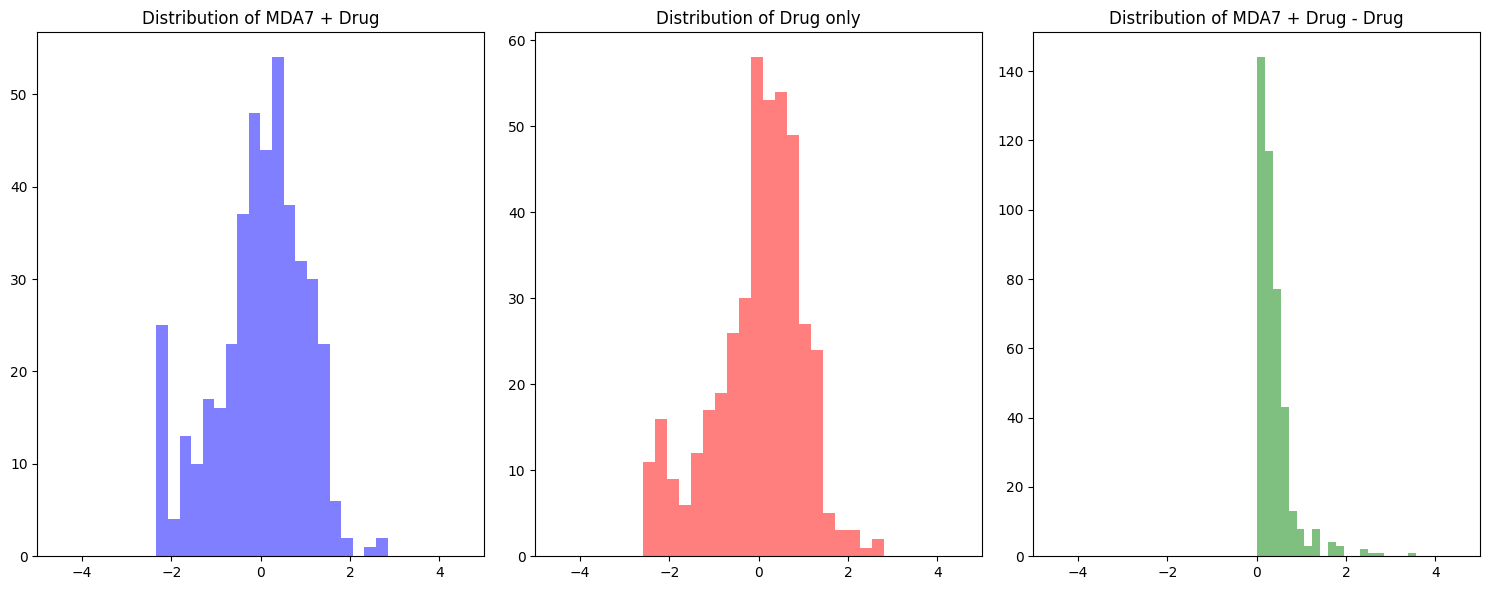

In [14]:
# Plot all three distributions
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

# Plot MDA7 + Drug
axs[0].hist(x, bins=20, alpha=0.5, color='b')
axs[0].set_title('Distribution of MDA7 + Drug')
axs[0].set_xlim(-5, 5)

# Plot Drug only
axs[1].hist(y, bins=20, alpha=0.5, color='r')
axs[1].set_title('Distribution of Drug only')
axs[1].set_xlim(-5, 5)

# Plot MDA7 + Drug - Drug
axs[2].hist(MDA7_only_data, bins=20, alpha=0.5, color='g')
axs[2].set_title('Distribution of MDA7 + Drug - Drug')
axs[2].set_xlim(-5, 5)

plt.tight_layout()
plt.show()


In [15]:
# Save values as target sets

h5f = h5py.File('y_MDA7+DRUG.h5', 'w')
h5f.create_dataset('data', data=x)
h5f.close()

h5f = h5py.File('y_DRUG.h5', 'w')
h5f.create_dataset('data', data=y)
h5f.close()

h5f = h5py.File('y_MDA7.h5', 'w')
h5f.create_dataset('data', data=MDA7_only_data)
h5f.close()

In [16]:
h5f1 = h5py.File('y_MDA7+DRUG.h5', 'r')
data1 = h5f1['data'][:]

h5f2 = h5py.File('y_DRUG.h5', 'r')
data2 = h5f2['data'][:]

h5f3 = h5py.File('y_MDA7.h5', 'r')
data3 = h5f3['data'][:]

print(data1.shape, data2.shape, data3.shape)

(425,) (425,) (425,)


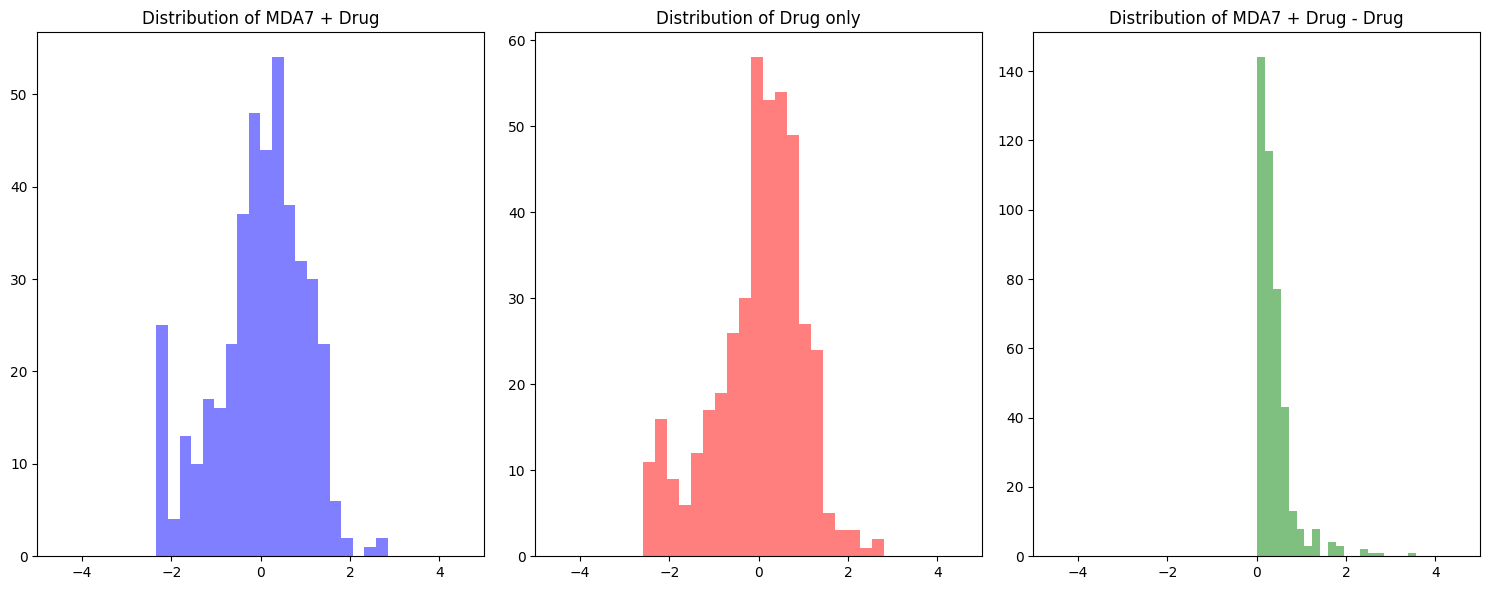

In [17]:
# Plot all three distributions
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

# Plot MDA7 + Drug
axs[0].hist(data1, bins=20, alpha=0.5, color='b')
axs[0].set_title('Distribution of MDA7 + Drug')
axs[0].set_xlim(-5, 5)

# Plot Drug only
axs[1].hist(data2, bins=20, alpha=0.5, color='r')
axs[1].set_title('Distribution of Drug only')
axs[1].set_xlim(-5, 5)

# Plot MDA7 + Drug - Drug
axs[2].hist(data3, bins=20, alpha=0.5, color='g')
axs[2].set_title('Distribution of MDA7 + Drug - Drug')
axs[2].set_xlim(-5, 5)

plt.tight_layout()
plt.show()
